<a href="https://colab.research.google.com/github/SebastienLiger/Portfolio-Finance/blob/Finance/Fronti%C3%A8re_Efficiente_Equity_Growth_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
# HISTORICAL PRICES BY COMPANY FROM 2019-01-01 TO 2023-01-01

start_date = "2019-01-01"
end_date = "2023-01-01"
symbols = ["SAP", "OR.PA", "SQI.PA", "MA", "FDE.PA", "SU.PA", "DSY.PA", "MC.PA",
    "AIR.PA", "HO.PA", "GE", "NEOEN.PA", "2FE.DE", "RBT.PA", "AI.PA", "GTT.PA", "RMS.PA", "NVDA", "BLQA.F", "TSLA"]

tickers_to_names = {
    "SAP": "SAP",
    "OR.PA": "L'Oréal",
    "SQI.PA": "SQLI",
    "MA": "MasterCard",
    "FDE.PA": "La Française de l'Énergie",
    "SU.PA": "Schneider Electric",
    "DSY.PA": "Dassault Systèmes",
    "MC.PA": "LVMH",
    "AIR.PA": "Airbus",
    "HO.PA": "Thales",
    "GE": "General Electric",
    "NEOEN.PA": "Neoen",
    "2FE.DE": "Ferrari",
    "RBT.PA": "Robertet",
    "AI.PA": "Air Liquide",
    "GTT.PA": "Gaztransport & Technigaz",
    "RMS.PA": "Hermès International",
    "NVDA": "NVIDIA Corporation",
    "BLQA.F": "BlackRock",
    "TSLA": "Tesla, Inc."
}

# Téléchargement des données
stocks_df = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Renommer les colonnes du DataFrame selon les noms des sociétés
stocks_df_renamed = stocks_df.rename(columns=tickers_to_names)

# Appliquer le formatage pour afficher seulement 2 décimales et ajouter le signe euros
formatted_df_euros = stocks_df_renamed.applymap(lambda x: f"€{x:.2f}")

# Affichage du DataFrame formaté avec le signe euros et deux décimales
formatted_df_euros

[*********************100%%**********************]  20 of 20 completed


Ticker,Ferrari,Air Liquide,Airbus,BlackRock,Dassault Systèmes,La Française de l'Énergie,General Electric,Gaztransport & Technigaz,Thales,MasterCard,LVMH,Neoen,NVIDIA Corporation,L'Oréal,Robertet,Hermès International,SAP,SQLI,Schneider Electric,"Tesla, Inc."
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,€83.58,€79.25,€78.12,€293.06,€20.12,€11.30,€47.40,€54.15,€89.60,€184.26,€232.63,€16.06,€33.79,€183.08,€483.92,€461.65,€90.68,€16.14,€52.22,€20.67
2019-01-03,€82.67,€77.79,€75.37,€286.32,€18.83,€11.35,€47.46,€54.93,€87.41,€175.95,€223.76,€15.96,€31.75,€180.88,€487.74,€448.50,€87.28,€15.90,€50.78,€20.02
2019-01-04,€86.19,€79.95,€79.00,€293.17,€19.57,€11.80,€48.46,€55.71,€90.04,€184.28,€230.65,€15.89,€33.78,€183.44,€501.13,€461.84,€90.28,€16.06,€52.66,€21.18
2019-01-07,€88.20,€79.51,€77.55,€294.90,€19.95,€11.80,€51.47,€55.87,€88.10,€185.69,€230.24,€16.08,€35.57,€181.11,€506.87,€456.43,€91.17,€16.10,€52.43,€22.33
2019-01-08,€90.92,€79.62,€80.42,€295.43,€20.24,€13.00,€50.41,€55.62,€89.42,€187.05,€237.45,€16.45,€34.68,€182.21,€493.48,€463.87,€92.59,€16.42,€52.84,€22.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,€197.38,€131.29,€110.17,€638.35,€33.13,€38.05,€63.66,€98.47,€116.02,€340.98,€663.31,€35.21,€151.99,€328.63,€826.48,€1431.02,€101.81,€43.70,€128.58,€123.15
2022-12-27,€197.57,€131.51,€111.24,€638.64,€33.37,€38.10,€64.47,€98.27,€116.56,€343.52,€679.46,€35.10,€141.14,€332.08,€826.48,€1460.28,€101.65,€43.70,€129.85,€109.10
2022-12-28,€197.62,€130.96,€110.05,€639.60,€33.13,€37.55,€63.80,€97.79,€115.82,€339.34,€675.91,€34.75,€140.29,€330.75,€836.38,€1450.36,€100.15,€44.00,€129.21,€112.71


In [3]:
# HISTORICAL ANNUALIZED RETURN BY COMPANY FROM 2019-01-01 TO 2023-01-01

# Calculer les rendements quotidiens des actions
daily_returns = stocks_df_renamed.pct_change()

# Calculer les rendements annuels moyens des actions
annual_return = (daily_returns.mean() * 250) + 1  # Multiplier par 250 jours ouvrables

# Calculer la covariance des rendements quotidiens et annuels
cov_daily = daily_returns.cov()
cov_annual = cov_daily * 250

# Création d'un tableau pour afficher les rendements annuels moyens avec les noms des sociétés
annual_return_table = pd.DataFrame(annual_return, columns=["Rendement Annuel"])
annual_return_table

,Rendement Annuel
Ticker,
Ferrari,1.248252
Air Liquide,1.143826
Airbus,1.183149
BlackRock,1.245808
Dassault Systèmes,1.168197
La Française de l'Énergie,1.392875
General Electric,1.172374
Gaztransport & Technigaz,1.195518
Thales,1.112250


In [4]:
# PORTFOLIO SIMULATION (RETURN, VOLATILITY, SHARPE RATIO, ALLOCATION)

num_portfolios = 10000  # Nombre de portefeuilles à simuler
num_stocks = len(symbols)  # Nombre d'actions dans votre portefeuille

treasuries_us = yf.Ticker("^TNX")

# Essayez de récupérer les données sur une plus grande période pour s'assurer d'obtenir la dernière donnée
current_data_risk_free_rate = treasuries_us.history(period="1mo")  # Changement de '1d' à '1mo'

# Vérifiez si des données de prix sont disponibles et récupérez la dernière donnée non nulle
if not current_data_risk_free_rate.empty and not current_data_risk_free_rate["Close"].dropna().empty:
    current_price_risk_free_rate = current_data_risk_free_rate["Close"].dropna().iloc[-1]
    current_price_RFR = current_price_risk_free_rate / 100
else:
    # Si aucune donnée n'est disponible, définir une valeur par défaut ou gérer l'erreur
    print("Aucune donnée de taux sans risque disponible pour ^TNX.")
    # Utiliser une valeur de taux sans risque par défaut
    current_price_RFR = 0.03

# Containers pour les résultats
portfolio_returns = []
portfolio_volatility = []
sharpe_ratios = []
stock_weights = []

for _ in range(num_portfolios):
    # Générer des poids aléatoires pour chaque action
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)  # Normaliser les poids pour qu'ils somment à 1
    stock_weights.append(weights)

    # Calculer le rendement et la volatilité du portefeuille pour les poids générés
    returns = np.sum(weights * daily_returns.mean()) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

    # Calculer le ratio de Sharpe
    sharpe_ratio = (returns - current_price_RFR) / volatility

    # Ajouter les résultats aux listes
    portfolio_returns.append(returns)
    portfolio_volatility.append(volatility)
    sharpe_ratios.append(sharpe_ratio)

# Créer un DataFrame avec les résultats
portfolio_data = {
    'Returns': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': sharpe_ratios
}

# Ajouter les poids des actions au DataFrame en utilisant les noms des sociétés
for counter, symbol in enumerate(symbols):
    # Utiliser tickers_to_names pour obtenir le nom de la société à partir du ticker
    company_name = tickers_to_names.get(symbol, symbol)  # Garde le symbole si le nom n'est pas trouvé
    portfolio_data[company_name + ' Weight'] = [weights[counter] for weights in stock_weights]

df = pd.DataFrame(portfolio_data)
df

,Returns,Volatility,Sharpe Ratio,SAP Weight,L'Oréal Weight,SQLI Weight,MasterCard Weight,La Française de l'Énergie Weight,Schneider Electric Weight,Dassault Systèmes Weight,...,General Electric Weight,Neoen Weight,Ferrari Weight,Robertet Weight,Air Liquide Weight,Gaztransport & Technigaz Weight,Hermès International Weight,NVIDIA Corporation Weight,BlackRock Weight,"Tesla, Inc. Weight"
0,0.244531,0.212083,0.955340,0.011833,0.111883,0.100388,0.045101,0.043249,0.089287,0.057240,...,0.009419,0.033706,0.038925,0.017989,0.023140,0.043828,0.049081,0.027474,0.034143,0.039362
1,0.270267,0.203900,1.119896,0.035905,0.075693,0.006736,0.086483,0.036617,0.073689,0.015222,...,0.053067,0.005240,0.042913,0.069559,0.033564,0.074294,0.053902,0.081755,0.060738,0.059989
2,0.248787,0.196174,1.054512,0.086347,0.076980,0.038621,0.051584,0.048768,0.089330,0.019117,...,0.026215,0.043712,0.039751,0.012169,0.046337,0.007262,0.057870,0.080808,0.032760,0.032265
3,0.237611,0.222027,0.881384,0.075891,0.014891,0.092475,0.069158,0.033438,0.014261,0.054207,...,0.026661,0.078515,0.065517,0.023390,0.009458,0.000744,0.076841,0.034880,0.094153,0.027235
4,0.222385,0.198940,0.907129,0.041966,0.045861,0.064447,0.035439,0.039264,0.004191,0.052669,...,0.024443,0.063068,0.022299,0.015375,0.086347,0.039676,0.074529,0.086469,0.084062,0.014840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.255224,0.209695,1.017215,0.041082,0.061942,0.065772,0.084550,0.011263,0.019744,0.003327,...,0.028940,0.103289,0.002661,0.024206,0.043206,0.104978,0.067016,0.031807,0.005980,0.088836
9996,0.265381,0.220010,1.015687,0.037201,0.038268,0.040908,0.075689,0.028282,0.070644,0.089552,...,0.021148,0.032332,0.076955,0.078916,0.088105,0.023827,0.039751,0.007201,0.018016,0.077294
9997,0.249383,0.212207,0.977641,0.110764,0.108601,0.004564,0.083232,0.013930,0.000630,0.028041,...,0.000258,0.049777,0.086421,0.019399,0.038760,0.051422,0.082310,0.040320,0.027448,0.058001
9998,0.263332,0.208001,1.064476,0.062368,0.060893,0.076774,0.031603,0.015970,0.082768,0.033605,...,0.081098,0.064188,0.066118,0.035089,0.073024,0.029282,0.047763,0.042950,0.035052,0.037666


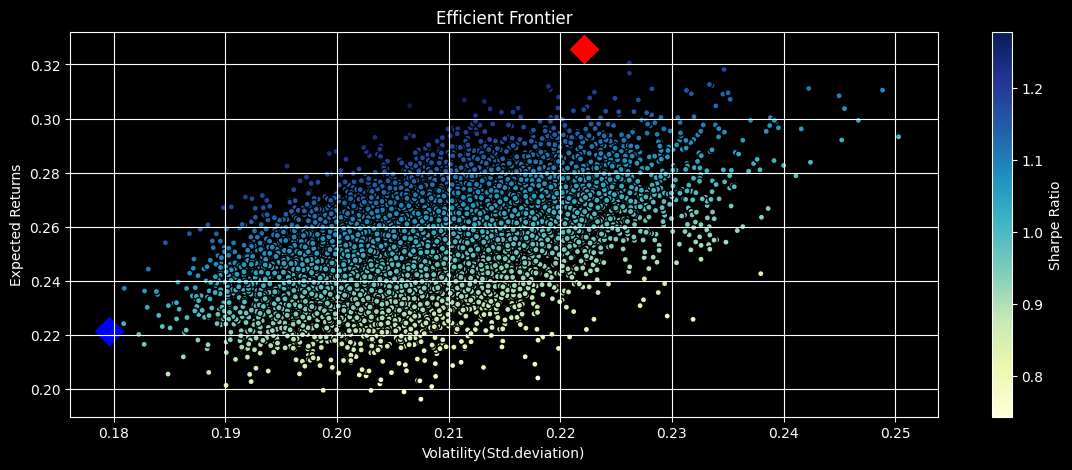

╒══════════════════════════════════╤════════════════════════════════╤════════════════════════════╕
│                                  │ Minimum Risk Adjusted Values   │ Max Risk Adjusted Values   │
╞══════════════════════════════════╪════════════════════════════════╪════════════════════════════╡
│ Returns                          │ 22.14%                         │ 32.56%                     │
├──────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ Volatility                       │ 17.96%                         │ 22.21%                     │
├──────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ Sharpe Ratio                     │ 99.93%                         │ 1.277                      │
├──────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ SAP Weight                       │ 10.21%                         │ 5.42%                      │
├─────────

In [5]:
# FINAL ALLOCATION IN ORDER TO DECREASE VOLATILITY OR INCREASE EXPECTED RETURN

min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

max_sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.style.use("dark_background")
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='YlGnBu', edgecolors='black', figsize=(14, 5), grid=True)
plt.scatter(x=max_sharpe_portfolio['Volatility'], y=max_sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200)
plt.xlabel('Volatility(Std.deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

r_ef = pd.concat([min_variance_port.T, max_sharpe_portfolio.T], axis=1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]

# Formatage des données
def format_value(x):
    if isinstance(x, float):
        # Pour le ratio de Sharpe, format avec 3 décimales
        if x > 1:
            return f"{x:.3f}"
        # Pour les poids, conversion en pourcentage avec 2 décimales
        else:
            return f"{x*100:.2f}%"
    return x

r_ef = r_ef.applymap(format_value)
from tabulate import tabulate

print(tabulate(r_ef, headers='keys', tablefmt='fancy_grid'))